In [1]:
import pandas as pd
import numpy as np

In [3]:
ghg_emissions = pd.read_csv('GHG_Emissions.csv')
renewable_elec_percentage = pd.read_csv('renewable_elec_production_percentage.csv')

In [13]:
ghg_emissions.head()

,Country ID,Country,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,36,Australia,"4,30,216.38","4,30,612.56","4,30,653.33","4,39,004.90","4,46,681.85","4,58,841.60","4,72,629.67","4,78,199.84",...,"5,40,669.00","5,44,285.46","5,40,571.41","5,42,511.92","5,44,732.76","5,35,006.81","5,30,411.02","5,38,618.78","5,48,862.55","5,56,612.27"
1,40,Austria,"75,524.00","75,771.05","76,016.83","79,382.99","82,605.50","82,175.96","81,511.96","79,931.07",...,"86,747.76","80,163.13","84,612.84","82,286.89","79,528.79","79,971.98","76,346.01","78,509.78","79,467.29","82,023.36"
2,112,Belarus,"1,18,221.92","1,05,280.61","88,379.27","81,851.22","83,443.71","84,415.87","85,898.56","79,655.96",...,"93,988.59","90,091.83","92,278.15","91,896.01","92,826.79","93,891.18","93,037.12","88,445.26","90,043.58","91,112.50"
3,56,Belgium,"1,48,737.28","1,47,741.14","1,52,361.11","1,54,495.96","1,58,184.69","1,49,720.79","1,54,897.83","1,48,647.76",...,"1,39,699.33","1,27,051.68","1,34,315.86","1,23,782.51","1,20,922.50","1,20,949.31","1,15,215.77","1,19,418.39","1,18,172.44","1,18,005.10"
4,100,Bulgaria,"77,727.07","76,742.25","73,107.41","74,614.54","74,782.90","71,967.78","67,955.96","60,709.30",...,"67,142.57","58,154.08","60,726.73","65,995.81","60,940.95","55,666.99","58,679.25","61,920.68","59,345.03","61,682.76"


In [17]:
year_cols = [col for col in ghg_emissions.columns if col.strip().isdigit()]

for col in year_cols:
    ghg_emissions.loc[:, col] = (
        ghg_emissions[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

for col in year_cols:
    ghg_emissions[col] = pd.to_numeric(ghg_emissions[col], errors='coerce')

In [23]:
ghg_emissions_df = ghg_emissions.copy()

In [37]:
renew_elec_pc_df = renewable_elec_percentage.copy()

In [89]:
renew_elec_pc_df.rename(
    columns={'Country and area': 'Country'},
    inplace=True
)

In [91]:
renew_elec_pc_df.rename(
    columns={'CountryID': 'Country ID'},
    inplace=True
)

renew_elec_pc_df.head()

,Country ID,Country,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,36,Australia,9.88,10.37,9.95,9.39,8.87,9.23,8.07,8.15,...,6.28,6.39,7.52,9.57,9.32,11.91,13.21,11.91,13.15,14.32
1,40,Austria,70.52,72.03,69.13,67.79,64.74,65.51,67.19,68.55,...,63.91,66.13,61.48,60.63,69.57,72.57,75.61,71.04,72.15,70.25
2,112,Belarus,0.05,0.06,0.06,0.08,0.07,0.08,0.12,0.07,...,0.11,0.15,0.13,0.13,0.25,0.46,0.38,0.41,0.73,1.71
3,56,Belgium,1.61,1.45,1.65,1.67,1.59,1.63,1.81,1.78,...,3.16,3.29,3.97,5.58,8.18,10.10,12.88,15.03,12.27,13.53
4,100,Bulgaria,5.79,5.11,3.85,5.54,6.83,6.86,7.98,7.80,...,7.55,10.03,13.72,9.21,12.73,17.23,16.34,18.29,16.37,14.11


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [41]:
sns.set_style("darkgrid")

In [45]:
emissions_only = ghg_emissions_df.drop(columns=['Country ID', 'Country'])
total_emissions = emissions_only.sum(axis=0)

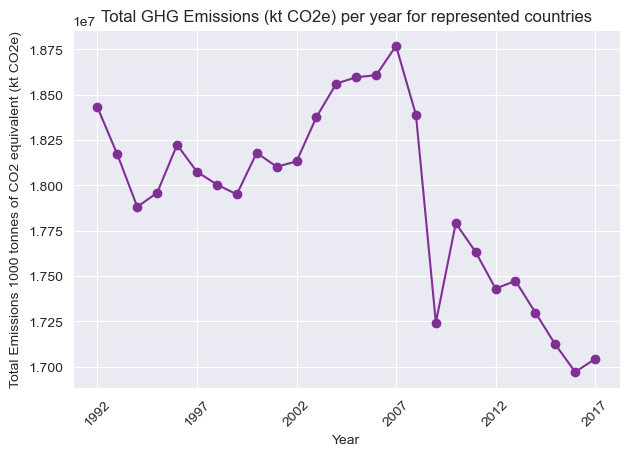

In [71]:
plt.figure
total_emissions.plot(kind='line', marker='o', color='#802f95')

plt.title('Total GHG Emissions (kt CO2e) per year for represented countries')
plt.xlabel('Year')
plt.ylabel('Total Emissions 1000 tonnes of CO2 equivalent (kt CO2e)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
ghg_emissions_df.head()

,Country ID,Country,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,36,Australia,430216.38,430612.56,430653.33,439004.90,446681.85,458841.60,472629.67,478199.84,...,540669.00,544285.46,540571.41,542511.92,544732.76,535006.81,530411.02,538618.78,548862.55,556612.27
1,40,Austria,75524.00,75771.05,76016.83,79382.99,82605.50,82175.96,81511.96,79931.07,...,86747.76,80163.13,84612.84,82286.89,79528.79,79971.98,76346.01,78509.78,79467.29,82023.36
2,112,Belarus,118221.92,105280.61,88379.27,81851.22,83443.71,84415.87,85898.56,79655.96,...,93988.59,90091.83,92278.15,91896.01,92826.79,93891.18,93037.12,88445.26,90043.58,91112.50
3,56,Belgium,148737.28,147741.14,152361.11,154495.96,158184.69,149720.79,154897.83,148647.76,...,139699.33,127051.68,134315.86,123782.51,120922.50,120949.31,115215.77,119418.39,118172.44,118005.10
4,100,Bulgaria,77727.07,76742.25,73107.41,74614.54,74782.90,71967.78,67955.96,60709.30,...,67142.57,58154.08,60726.73,65995.81,60940.95,55666.99,58679.25,61920.68,59345.03,61682.76


In [57]:
year_columns = ghg_emissions_df.columns[2:]
ghg_emissions_df['total emissions'] = ghg_emissions_df[year_columns].sum(axis=1)

In [61]:
ghg_emissions_per_country = ghg_emissions_df.sort_values(by='total emissions', ascending=False)

In [67]:
ghg_emissions_per_country_top_20 = ghg_emissions_df.sort_values(by='total emissions', ascending=False).head(20)

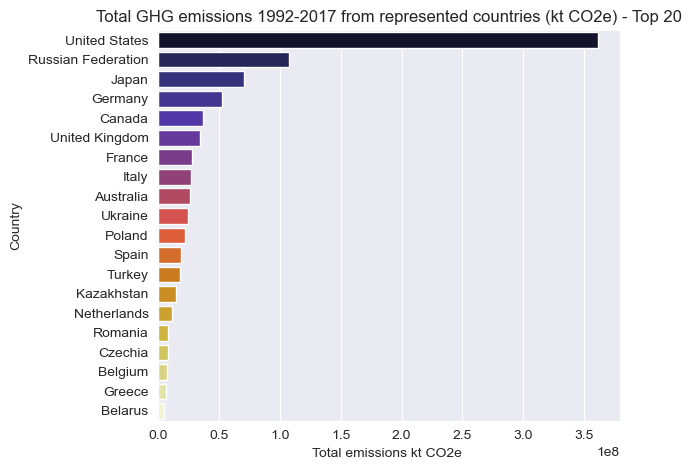

In [97]:
sns.barplot(
    x = 'total emissions',
    y = 'Country',
    data=ghg_emissions_per_country_top_20,
    hue='Country',
    palette='CMRmap',
    legend=False   
)
plt.title('Total GHG emissions 1992-2017 from represented countries (kt CO2e) - Top 20')
plt.xlabel('Total emissions kt CO2e ')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [95]:
elec_only = renew_elec_pc_df.drop(columns=['Country ID', 'Country'])
combined_percentage = elec_only.mean(axis=0)

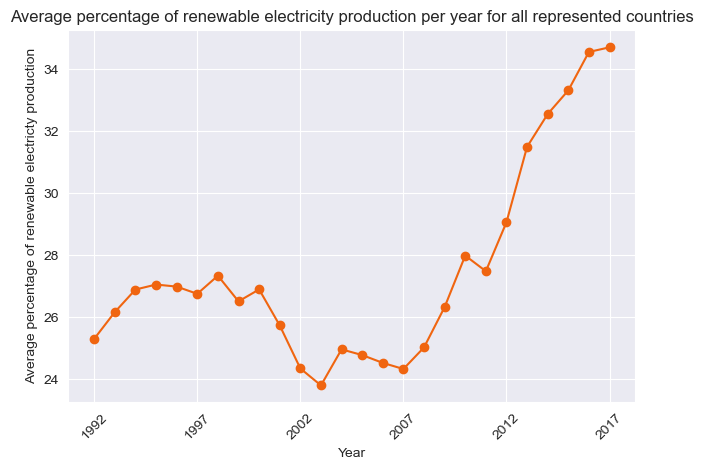

In [99]:
plt.figure
combined_percentage.plot(kind='line', marker='o', color='#f06510')

plt.title('Average percentage of renewable electricity production per year for all represented countries')
plt.xlabel('Year')
plt.ylabel('Average percentage of renewable electricty production')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
year_columns = renew_elec_pc_df.columns[2:]
renew_elec_pc_df['average percentage'] = renew_elec_pc_df[year_columns].mean(axis=1)

In [103]:
renew_elec_pc_per_country = renew_elec_pc_df.sort_values(by='average percentage', ascending=False).head(20)

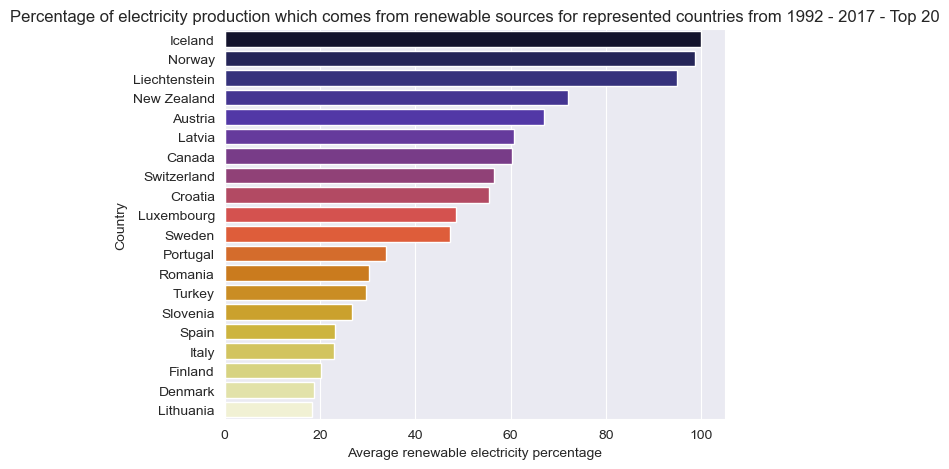

In [105]:
sns.barplot(
    x = 'average percentage',
    y = 'Country',
    data=renew_elec_pc_per_country,
    hue='Country',
    palette='CMRmap',
    legend=False   
)
plt.title('Percentage of electricity production which comes from renewable sources for represented countries from 1992 - 2017 - Top 20')
plt.xlabel('Average renewable electricity percentage')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

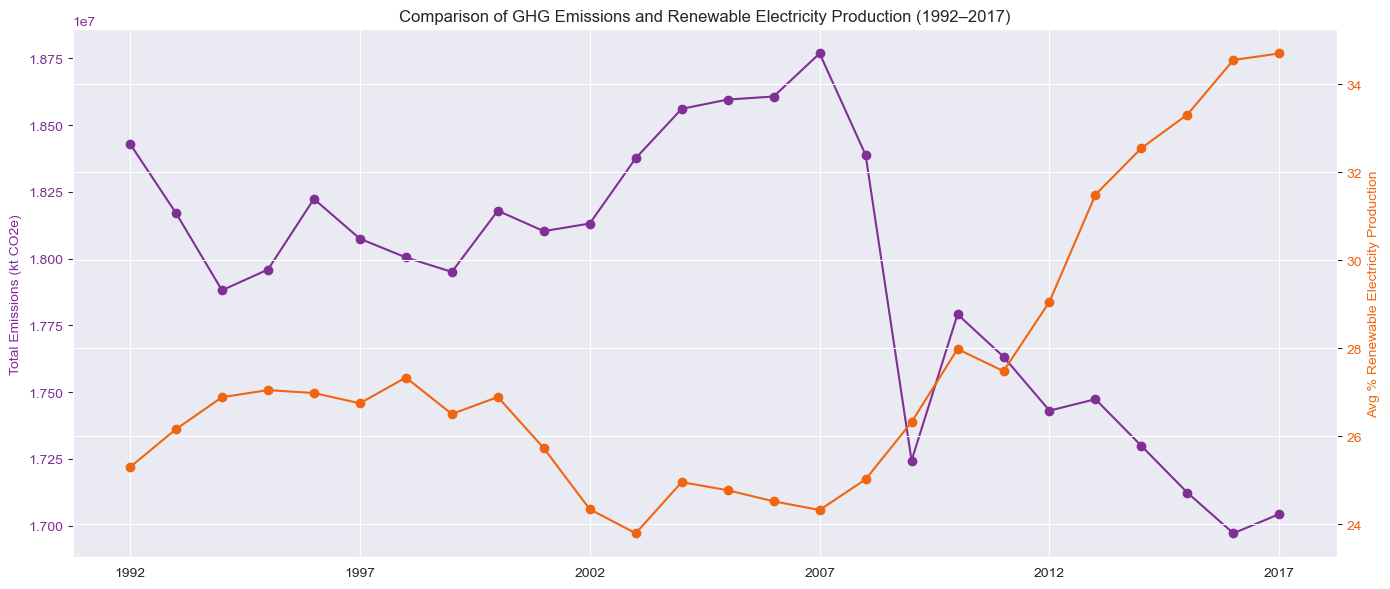

In [111]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# GHG Emissions on primary y-axis
total_emissions.plot(kind='line', marker='o', color='#802f95', ax=ax1)
ax1.set_ylabel('Total Emissions (kt CO2e)', color='#802f95')
ax1.tick_params(axis='y', labelcolor='#802f95')

# Renewable electricity production percentage on secondary y-axis
ax2 = ax1.twinx()
combined_percentage.plot(kind='line', marker='o', color='#f06510', ax=ax2)
ax2.set_ylabel('Avg % Renewable Electricity Production', color='#f06510')
ax2.tick_params(axis='y', labelcolor='#f06510')

ax1.xaxis.grid(True)
ax1.yaxis.grid(False)

plt.title('Comparison of GHG Emissions and Renewable Electricity Production (1992–2017)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
import matplotlib.gridspec as gridspec

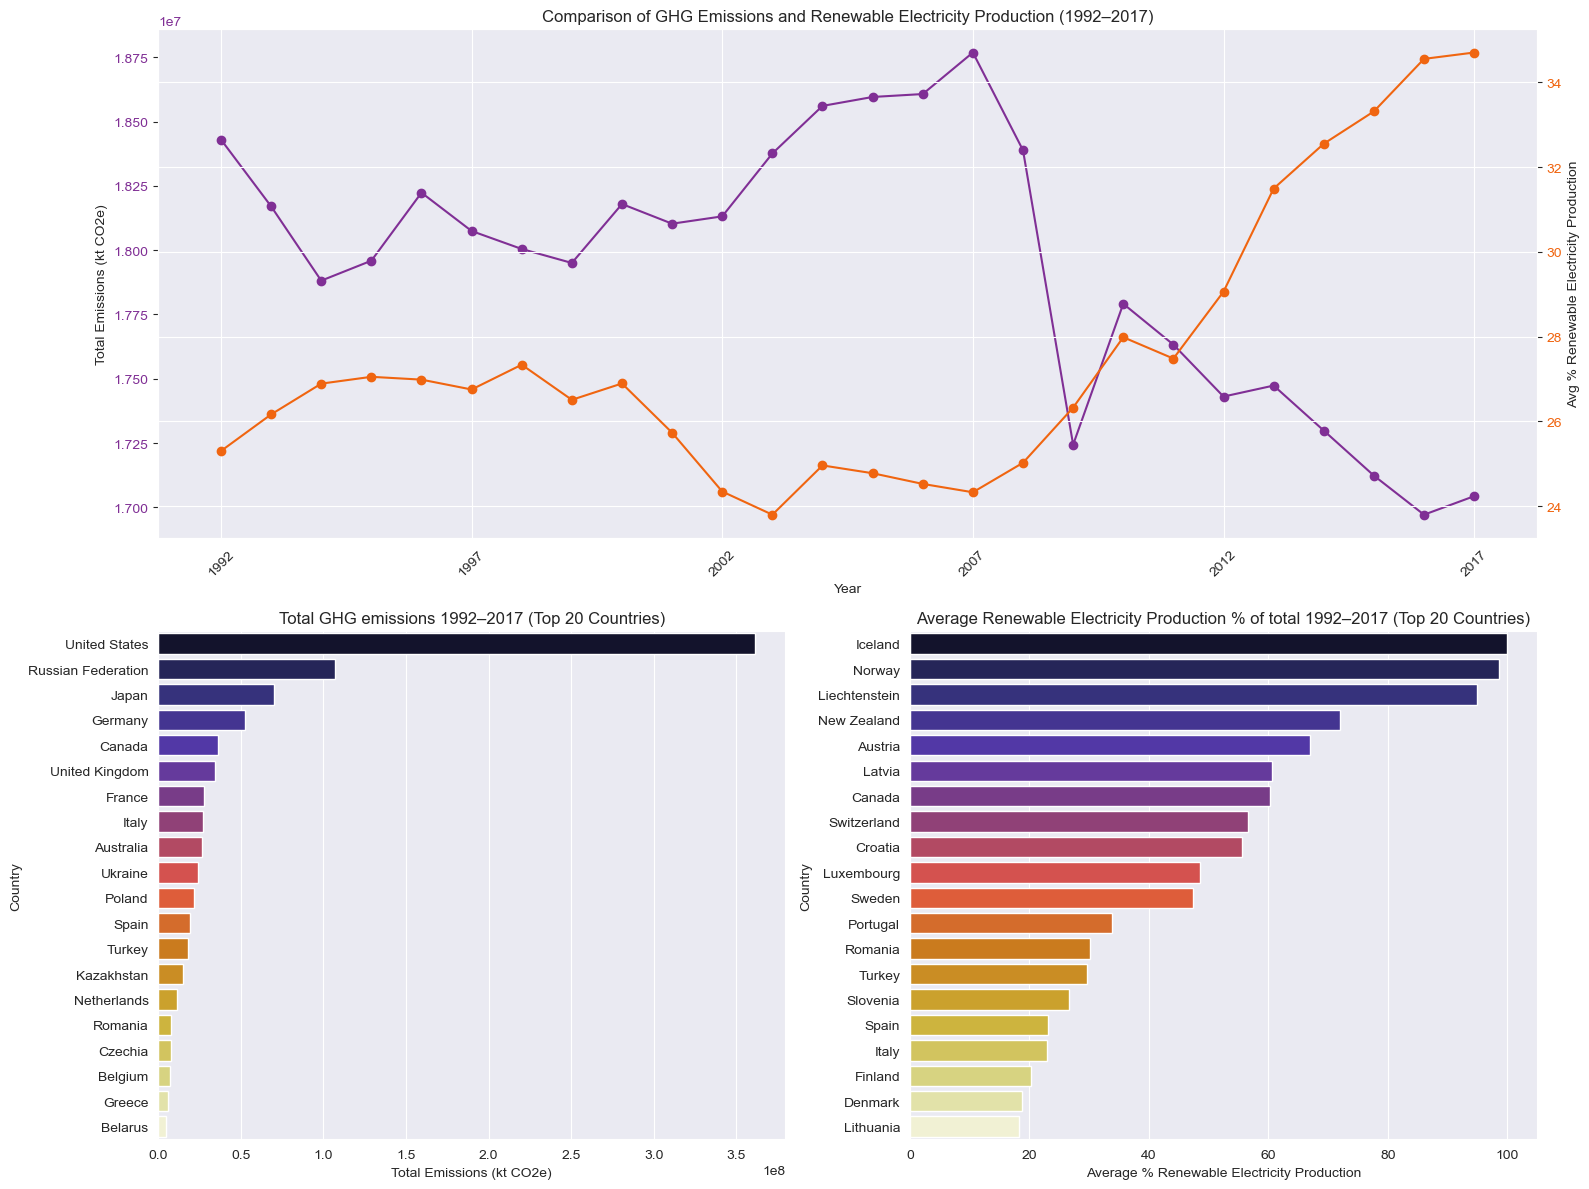

In [137]:
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

#Line charts
ax1 = fig.add_subplot(gs[0, :])
total_emissions.plot(kind='line', marker='o', color='#802f95', ax=ax1, label='GHG Emissions')
ax1.set_ylabel('Total Emissions (kt CO2e)')
ax1.tick_params(axis='y', labelcolor='#802f95')

ax2 = ax1.twinx()
combined_percentage.plot(kind='line', marker='o', color='#f06510', ax=ax2)
ax2.set_ylabel('Avg % Renewable Electricity Production')
ax2.tick_params(axis='y', labelcolor='#f06510')

# Formatting
ax1.xaxis.grid(True)
ax1.yaxis.grid(False)
ax1.set_title('Comparison of GHG Emissions and Renewable Electricity Production (1992–2017)')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Year')
fig.tight_layout(pad=3.0)

# First lower plot
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(
    x='total emissions',
    y='Country',
    data=ghg_emissions_per_country_top_20,
    hue='Country',
    palette='CMRmap',
    legend=False,
    ax=ax3
)
ax3.set_title('Total GHG emissions 1992–2017 (Top 20 Countries)')
ax3.set_xlabel('Total Emissions (kt CO2e)')
ax3.set_ylabel('Country')

# Second lower plot
ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(
    x='average percentage',
    y='Country',
    data=renew_elec_pc_per_country,
    hue='Country',
    palette='CMRmap',
    legend=False,
    ax=ax4
)
ax4.set_title('Average Renewable Electricity Production % of total 1992–2017 (Top 20 Countries)')
ax4.set_xlabel('Average % Renewable Electricity Production')
ax4.set_ylabel('Country')

# Final layout adjustment
plt.tight_layout()
plt.show()